# Coding Logistic Regression From Scratch - Lab

## Introduction

In this lab, you'll practice your ability to translate mathematical algorithms into Python functions. This will deepen and solidify your understanding of logistic regression!

## Objectives

In this lab you will: 

- Build a logistic regression model from scratch using gradient descent 

## Overview

Recall that the logistic regression algorithm builds upon the intuition from linear regression. In logistic regression, you start by taking the input data, `X`, and multiplying it by a vector of weights for each of the individual features, which produces an output, `y`. Afterward, you'll work on using an iterative approach via gradient descent to tune these weights. 

## Linear regression setup

Write a simple function `predict_y()` that takes in a matrix `X` of observations and a vector of feature weights `w` and outputs a vector of predictions for the various observations.

Recall that this is the sum of the product of each of the feature observations and their corresponding feature weights:  
  
$\large \hat{y}_i = X_{i1} \cdot w_1 + X_{i2} \cdot w_2 + X_{i3} \cdot w_3 + ... + X_{in} \cdot w_n$

> **Hint**: Think about which mathematical operation you've seen previously that will take a matrix (`X`) and multiply it by a vector of weights (`w`). Use NumPy! 

In [1]:
import numpy as np


In [2]:
X= np.array([[1,2,3,4],[5,6,7,8]])
w = np.array([[2],[2],[2],[2]])
y=np.dot(X,w)
X,w,y

(array([[1, 2, 3, 4],
        [5, 6, 7, 8]]), array([[2],
        [2],
        [2],
        [2]]), array([[20],
        [52]]))

In [3]:
y.shape,w.shape,X.shape,len(X.T),X.shape[1]


((2, 1), (4, 1), (2, 4), 4, 4)

In [4]:
# Your code here

def predict_y(X, w): 
    # each column of X is a different feature
    # each line of X is an observation 
    # w is a column matrix each line is a weight to apply to the corresponding feature
    # y is a column matrix, each line is the prediction corresponding to an observation (or line) of X 
    # product of matrices X and w. # of columns of X = # of rows of w  
    y=np.dot(X,w) 
    return y

In [5]:
predict_y(X,w)

array([[20],
       [52]])

## The sigmoid function

Recall that the sigmoid function is used to map the linear regression model output to a range of 0 to 1, satisfying basic premises of probability. As a reminder, the sigmoid function is defined by:  
  
$S(x) = \dfrac{1}{1+e^(-x)}$   
  
Write this as a Python function where `x` is the input and the function outputs the result of the sigmoid function. 

> **Hint**: Use NumPy!

In [6]:
print(y)
z=y+1
print(z)

[[20]
 [52]]
[[21]
 [53]]


In [7]:
# Your code here
def sigmoid(x):
    sigmo=1/(1+np.exp(-x))
    return sigmo

In [8]:
sigmoid(y)

array([[1.],
       [1.]])

## Plot the sigmoid

For good measure, let's do a brief investigation of your new function. Plot the output of your `sigmoid()` function using 10,000 values evenly spaced from -20 to 20. 

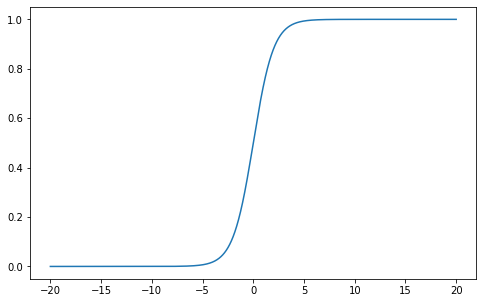

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot sigmoid
abs=np.linspace(-20,20,10000)
ord=sigmoid(abs)
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,5))
plt.plot(abs,ord)
plt.show()

## Gradient descent with the sigmoid function

Recall that gradient descent is a numerical method for finding a minimum to a cost function. In the case of logistic regression, you are looking to minimize the error between the model's predictions and the actual data labels. To do this, you first calculate an error vector based on the current model's feature weights. You then multiply the transpose of the training matrix itself by this error vector in order to obtain the gradient. Finally, you take the gradient, multiply it by the step size and add this to our current weight vector to update it. Below, write such a function. It will take 5 inputs:  

* `X`  
* `y`   
* `max_iterations`   
* `alpha` (the step size)   
* `initial_weights`   


By default, have your function set the `initial_weights` parameter to a vector where all feature weights are set to 1. 

In [83]:
# Your code here
def grad_desc(X, y, max_iterations, alpha, initial_weights=None):
    
    """Be sure to set default behavior for the initial_weights parameter."""
    # X has p columns = p features
    # X has n lines = n observations
    # weights are a column vector with p lines, such as X*w=y
    
    if (initial_weights==None) is True:
        initial_weights=np.ones((X.shape[1],1))
        
    # initialize weights
    w=initial_weights
    
    # set precision_treshold and initialize precision
    precision_treshold=1e-13 
    precision = 0.2
    
    # initialize niters
    niters = 0
    
    # Create a for loop of iterations
    while niters < max_iterations and precision > precision_treshold:
        # Generate predictions using the current feature weights
        y_linear=predict_y(X,w)
        y_predictions=sigmoid(y_linear)
        
        # Calculate an error vector based on these initial predictions and the correct labels
        error_vector=np.abs(y-y_predictions)
        
        # Calculate the gradient 
        # As we saw in the previous lab, calculating the gradient is often the most difficult task.
        # Here, your are provided with the closed form solution for the gradient of the log-loss function derived from MLE
        # For more details on the derivation, see the additional resources section below.
        gradient = np.dot(X.transpose(), error_vector) 
              
        # X has p columns = p features
        # X has n lines = n observations
        # weights are a column vector with p lines, such as X*w=y  (n,p)*(p,1) = (n,1)
        # y is a column vector with n lines (corresponding to the n observations) 
        # gradient dimensions: (p,n)*(n,1) = (p,1) . p lines corresponding to the p features

        # Update the weight vector take a step of alpha in direction of gradient 
        step=gradient*alpha
        w=w+step
        
        niters+=1
        # For precision, we calculate the L2 norm squared of the vector step 
        precision=np.dot(step.T,step)
        
#         print('y_predictions',y_predictions)
#         print ('precision,niters',precision,niters)
#         print ('w',w)
        
    print('final weights:')   
    # Return finalized weights and y_prediction
    return w




In [31]:
X,y

(array([[1, 2, 3, 4],
        [5, 6, 7, 8]]), array([[20],
        [52]]))

In [32]:
np.dot(X,[[1],[1],[1],[1]])

array([[10],
       [26]])

In [33]:
np.dot(X,[[2],[2],[2],[2]])

array([[20],
       [52]])

In [34]:
y_logistic=sigmoid(y)
y_logistic

array([[1.],
       [1.]])

In [36]:
grad_desc(X, y_logistic, max_iterations=1000, alpha=0.01, initial_weights=None)

y_predictions [[0.9999546]
 [1.       ]]
precision,niters [[6.18234128e-12]] 1
w [[1.00000045]
 [1.00000091]
 [1.00000136]
 [1.00000182]]
y_predictions [[0.9999546]
 [1.       ]]
precision,niters [[6.18217289e-12]] 2
w [[1.00000091]
 [1.00000182]
 [1.00000272]
 [1.00000363]]
y_predictions [[0.9999546]
 [1.       ]]
precision,niters [[6.1820045e-12]] 3
w [[1.00000136]
 [1.00000272]
 [1.00000409]
 [1.00000545]]
y_predictions [[0.9999546]
 [1.       ]]
precision,niters [[6.18183613e-12]] 4
w [[1.00000182]
 [1.00000363]
 [1.00000545]
 [1.00000726]]
y_predictions [[0.9999546]
 [1.       ]]
precision,niters [[6.18166776e-12]] 5
w [[1.00000227]
 [1.00000454]
 [1.00000681]
 [1.00000908]]
y_predictions [[0.99995461]
 [1.        ]]
precision,niters [[6.1814994e-12]] 6
w [[1.00000272]
 [1.00000545]
 [1.00000817]
 [1.00001089]]
y_predictions [[0.99995461]
 [1.        ]]
precision,niters [[6.18133104e-12]] 7
w [[1.00000318]
 [1.00000636]
 [1.00000953]
 [1.00001271]]
y_predictions [[0.99995461]
 [1.

y_predictions [[0.99995466]
 [1.        ]]
precision,niters [[6.16536864e-12]] 102
w [[1.00004627]
 [1.00009254]
 [1.00013882]
 [1.00018509]]
y_predictions [[0.99995467]
 [1.        ]]
precision,niters [[6.16520095e-12]] 103
w [[1.00004673]
 [1.00009345]
 [1.00014018]
 [1.0001869 ]]
y_predictions [[0.99995467]
 [1.        ]]
precision,niters [[6.16503326e-12]] 104
w [[1.00004718]
 [1.00009436]
 [1.00014154]
 [1.00018871]]
y_predictions [[0.99995467]
 [1.        ]]
precision,niters [[6.16486557e-12]] 105
w [[1.00004763]
 [1.00009526]
 [1.0001429 ]
 [1.00019053]]
y_predictions [[0.99995467]
 [1.        ]]
precision,niters [[6.1646979e-12]] 106
w [[1.00004809]
 [1.00009617]
 [1.00014426]
 [1.00019234]]
y_predictions [[0.99995467]
 [1.        ]]
precision,niters [[6.16453023e-12]] 107
w [[1.00004854]
 [1.00009708]
 [1.00014562]
 [1.00019415]]
y_predictions [[0.99995467]
 [1.        ]]
precision,niters [[6.16436257e-12]] 108
w [[1.00004899]
 [1.00009798]
 [1.00014698]
 [1.00019597]]
y_predi

y_predictions [[0.99995472]
 [1.        ]]
precision,niters [[6.14946799e-12]] 197
w [[1.00008931]
 [1.00017862]
 [1.00026793]
 [1.00035724]]
y_predictions [[0.99995472]
 [1.        ]]
precision,niters [[6.14930094e-12]] 198
w [[1.00008976]
 [1.00017953]
 [1.00026929]
 [1.00035905]]
y_predictions [[0.99995472]
 [1.        ]]
precision,niters [[6.1491339e-12]] 199
w [[1.00009022]
 [1.00018043]
 [1.00027065]
 [1.00036086]]
y_predictions [[0.99995472]
 [1.        ]]
precision,niters [[6.14896687e-12]] 200
w [[1.00009067]
 [1.00018134]
 [1.00027201]
 [1.00036268]]
y_predictions [[0.99995473]
 [1.        ]]
precision,niters [[6.14879984e-12]] 201
w [[1.00009112]
 [1.00018224]
 [1.00027336]
 [1.00036449]]
y_predictions [[0.99995473]
 [1.        ]]
precision,niters [[6.14863282e-12]] 202
w [[1.00009157]
 [1.00018315]
 [1.00027472]
 [1.0003663 ]]
y_predictions [[0.99995473]
 [1.        ]]
precision,niters [[6.1484658e-12]] 203
w [[1.00009203]
 [1.00018405]
 [1.00027608]
 [1.00036811]]
y_predic

y_predictions [[0.99995478]
 [1.        ]]
precision,niters [[6.13462733e-12]] 286
w [[1.00012958]
 [1.00025916]
 [1.00038874]
 [1.00051832]]
y_predictions [[0.99995478]
 [1.        ]]
precision,niters [[6.13446088e-12]] 287
w [[1.00013003]
 [1.00026007]
 [1.0003901 ]
 [1.00052013]]
y_predictions [[0.99995478]
 [1.        ]]
precision,niters [[6.13429445e-12]] 288
w [[1.00013049]
 [1.00026097]
 [1.00039146]
 [1.00052194]]
y_predictions [[0.99995478]
 [1.        ]]
precision,niters [[6.13412802e-12]] 289
w [[1.00013094]
 [1.00026187]
 [1.00039281]
 [1.00052375]]
y_predictions [[0.99995478]
 [1.        ]]
precision,niters [[6.13396159e-12]] 290
w [[1.00013139]
 [1.00026278]
 [1.00039417]
 [1.00052556]]
y_predictions [[0.99995478]
 [1.        ]]
precision,niters [[6.13379518e-12]] 291
w [[1.00013184]
 [1.00026368]
 [1.00039552]
 [1.00052737]]
y_predictions [[0.99995478]
 [1.        ]]
precision,niters [[6.13362877e-12]] 292
w [[1.00013229]
 [1.00026459]
 [1.00039688]
 [1.00052918]]
y_pred

precision,niters [[6.12000617e-12]] 374
w [[1.00016935]
 [1.0003387 ]
 [1.00050805]
 [1.0006774 ]]
y_predictions [[0.99995483]
 [1.        ]]
precision,niters [[6.11984032e-12]] 375
w [[1.0001698 ]
 [1.0003396 ]
 [1.00050941]
 [1.00067921]]
y_predictions [[0.99995483]
 [1.        ]]
precision,niters [[6.11967448e-12]] 376
w [[1.00017025]
 [1.00034051]
 [1.00051076]
 [1.00068102]]
y_predictions [[0.99995483]
 [1.        ]]
precision,niters [[6.11950865e-12]] 377
w [[1.00017071]
 [1.00034141]
 [1.00051212]
 [1.00068282]]
y_predictions [[0.99995483]
 [1.        ]]
precision,niters [[6.11934282e-12]] 378
w [[1.00017116]
 [1.00034231]
 [1.00051347]
 [1.00068463]]
y_predictions [[0.99995483]
 [1.        ]]
precision,niters [[6.119177e-12]] 379
w [[1.00017161]
 [1.00034322]
 [1.00051483]
 [1.00068644]]
y_predictions [[0.99995484]
 [1.        ]]
precision,niters [[6.11901118e-12]] 380
w [[1.00017206]
 [1.00034412]
 [1.00051618]
 [1.00068824]]
y_predictions [[0.99995484]
 [1.        ]]
precisio

y_predictions [[0.99995491]
 [1.        ]]
precision,niters [[6.09965722e-12]] 497
w [[1.00022486]
 [1.00044972]
 [1.00067458]
 [1.00089943]]
y_predictions [[0.99995491]
 [1.        ]]
precision,niters [[6.09949219e-12]] 498
w [[1.00022531]
 [1.00045062]
 [1.00067593]
 [1.00090124]]
y_predictions [[0.99995491]
 [1.        ]]
precision,niters [[6.09932718e-12]] 499
w [[1.00022576]
 [1.00045152]
 [1.00067728]
 [1.00090304]]
y_predictions [[0.99995491]
 [1.        ]]
precision,niters [[6.09916217e-12]] 500
w [[1.00022621]
 [1.00045242]
 [1.00067863]
 [1.00090485]]
y_predictions [[0.99995491]
 [1.        ]]
precision,niters [[6.09899717e-12]] 501
w [[1.00022666]
 [1.00045332]
 [1.00067999]
 [1.00090665]]
y_predictions [[0.99995491]
 [1.        ]]
precision,niters [[6.09883217e-12]] 502
w [[1.00022711]
 [1.00045423]
 [1.00068134]
 [1.00090845]]
y_predictions [[0.99995491]
 [1.        ]]
precision,niters [[6.09866718e-12]] 503
w [[1.00022756]
 [1.00045513]
 [1.00068269]
 [1.00091026]]
y_pred

precision,niters [[6.08532527e-12]] 584
w [[1.00026406]
 [1.00052813]
 [1.00079219]
 [1.00105626]]
y_predictions [[0.99995496]
 [1.        ]]
precision,niters [[6.08516083e-12]] 585
w [[1.00026452]
 [1.00052903]
 [1.00079355]
 [1.00105806]]
y_predictions [[0.99995496]
 [1.        ]]
precision,niters [[6.08499639e-12]] 586
w [[1.00026497]
 [1.00052993]
 [1.0007949 ]
 [1.00105986]]
y_predictions [[0.99995496]
 [1.        ]]
precision,niters [[6.08483196e-12]] 587
w [[1.00026542]
 [1.00053083]
 [1.00079625]
 [1.00106166]]
y_predictions [[0.99995496]
 [1.        ]]
precision,niters [[6.08466754e-12]] 588
w [[1.00026587]
 [1.00053173]
 [1.0007976 ]
 [1.00106346]]
y_predictions [[0.99995496]
 [1.        ]]
precision,niters [[6.08450313e-12]] 589
w [[1.00026632]
 [1.00053263]
 [1.00079895]
 [1.00106527]]
y_predictions [[0.99995496]
 [1.        ]]
precision,niters [[6.08433872e-12]] 590
w [[1.00026677]
 [1.00053353]
 [1.0008003 ]
 [1.00106707]]
y_predictions [[0.99995496]
 [1.        ]]
precis

precision,niters [[6.06956924e-12]] 680
w [[1.00030727]
 [1.00061455]
 [1.00092182]
 [1.00122909]]
y_predictions [[0.99995502]
 [1.        ]]
precision,niters [[6.06940544e-12]] 681
w [[1.00030772]
 [1.00061545]
 [1.00092317]
 [1.00123089]]
y_predictions [[0.99995502]
 [1.        ]]
precision,niters [[6.06924164e-12]] 682
w [[1.00030817]
 [1.00061635]
 [1.00092452]
 [1.00123269]]
y_predictions [[0.99995502]
 [1.        ]]
precision,niters [[6.06907785e-12]] 683
w [[1.00030862]
 [1.00061724]
 [1.00092587]
 [1.00123449]]
y_predictions [[0.99995502]
 [1.        ]]
precision,niters [[6.06891407e-12]] 684
w [[1.00030907]
 [1.00061814]
 [1.00092722]
 [1.00123629]]
y_predictions [[0.99995502]
 [1.        ]]
precision,niters [[6.06875029e-12]] 685
w [[1.00030952]
 [1.00061904]
 [1.00092857]
 [1.00123809]]
y_predictions [[0.99995502]
 [1.        ]]
precision,niters [[6.06858652e-12]] 686
w [[1.00030997]
 [1.00061994]
 [1.00092992]
 [1.00123989]]
y_predictions [[0.99995502]
 [1.        ]]
precis

y_predictions [[0.99995508]
 [1.        ]]
precision,niters [[6.05256917e-12]] 784
w [[1.00035402]
 [1.00070804]
 [1.00106206]
 [1.00141608]]
y_predictions [[0.99995508]
 [1.        ]]
precision,niters [[6.05240606e-12]] 785
w [[1.00035447]
 [1.00070894]
 [1.0010634 ]
 [1.00141787]]
y_predictions [[0.99995508]
 [1.        ]]
precision,niters [[6.05224295e-12]] 786
w [[1.00035492]
 [1.00070983]
 [1.00106475]
 [1.00141967]]
y_predictions [[0.99995508]
 [1.        ]]
precision,niters [[6.05207984e-12]] 787
w [[1.00035537]
 [1.00071073]
 [1.0010661 ]
 [1.00142147]]
y_predictions [[0.99995508]
 [1.        ]]
precision,niters [[6.05191675e-12]] 788
w [[1.00035582]
 [1.00071163]
 [1.00106745]
 [1.00142326]]
y_predictions [[0.99995508]
 [1.        ]]
precision,niters [[6.05175366e-12]] 789
w [[1.00035626]
 [1.00071253]
 [1.00106879]
 [1.00142506]]
y_predictions [[0.99995508]
 [1.        ]]
precision,niters [[6.05159058e-12]] 790
w [[1.00035671]
 [1.00071343]
 [1.00107014]
 [1.00142686]]
y_pred

y_predictions [[0.99995515]
 [1.        ]]
precision,niters [[6.03434115e-12]] 896
w [[1.00040429]
 [1.00080858]
 [1.00121286]
 [1.00161715]]
y_predictions [[0.99995515]
 [1.        ]]
precision,niters [[6.03417877e-12]] 897
w [[1.00040474]
 [1.00080947]
 [1.00121421]
 [1.00161894]]
y_predictions [[0.99995515]
 [1.        ]]
precision,niters [[6.0340164e-12]] 898
w [[1.00040518]
 [1.00081037]
 [1.00121555]
 [1.00162074]]
y_predictions [[0.99995515]
 [1.        ]]
precision,niters [[6.03385403e-12]] 899
w [[1.00040563]
 [1.00081127]
 [1.0012169 ]
 [1.00162253]]
y_predictions [[0.99995515]
 [1.        ]]
precision,niters [[6.03369167e-12]] 900
w [[1.00040608]
 [1.00081216]
 [1.00121824]
 [1.00162433]]
y_predictions [[0.99995515]
 [1.        ]]
precision,niters [[6.03352932e-12]] 901
w [[1.00040653]
 [1.00081306]
 [1.00121959]
 [1.00162612]]
y_predictions [[0.99995515]
 [1.        ]]
precision,niters [[6.03336697e-12]] 902
w [[1.00040698]
 [1.00081396]
 [1.00122094]
 [1.00162791]]
y_predi

array([[1.0004509 ],
       [1.0009018 ],
       [1.00135269],
       [1.00180359]])

In [96]:
# Flatiron solution + modifications
import pandas as pd

def grad_desc3(X, y, max_iterations, alpha, initial_weights=None):
    """Be sure to set default behavior for the initial_weights parameter."""
    if initial_weights == None:
        initial_weights = np.ones((X.shape[1],1)).flatten()
    weights_col= pd.DataFrame(initial_weights)
    weights = pd.DataFrame(initial_weights)
    # Create a for loop of iterations
    for iteration in range(max_iterations):
        # Generate predictions using the current feature weights
        predictions = pd.DataFrame(sigmoid(np.dot(X,weights)))
        # Calculate an error vector based on these initial predictions and the correct labels
        error_vector = y - predictions
        # Calculate the gradient 
        # As we saw in the previous lab, calculating the gradient is often the most difficult task.
        # Here, your are provided with the closed form solution for the gradient of the log-loss function derived from MLE
        # For more details on the derivation, see the additional resources section below.
        gradient = np.dot(X.transpose(),error_vector)
        # Update the weight vector take a step of alpha in direction of gradient 
        weights += alpha * gradient
        weights_col = pd.concat([weights_col, pd.DataFrame(weights)], axis=1)
    # Return finalized weights
    return weights, weights_col


In [97]:
# Flatiron solution
def grad_desc2(X, y, max_iterations, alpha, initial_weights=None):
    """Be sure to set default behavior for the initial_weights parameter."""
    if initial_weights == None:
        initial_weights = np.ones((X.shape[1],1)).flatten()
    weights_col= pd.DataFrame(initial_weights)
    weights = initial_weights
    # Create a for loop of iterations
    for iteration in range(max_iterations):
        # Generate predictions using the current feature weights
        predictions = sigmoid(np.dot(X,weights))
        # Calculate an error vector based on these initial predictions and the correct labels
        error_vector = y - predictions
        # Calculate the gradient 
        # As we saw in the previous lab, calculating the gradient is often the most difficult task.
        # Here, your are provided with the closed form solution for the gradient of the log-loss function derived from MLE
        # For more details on the derivation, see the additional resources section below.
        gradient = np.dot(X.transpose(),error_vector)
        # Update the weight vector take a step of alpha in direction of gradient 
        weights += alpha * gradient
        weights_col = pd.concat([weights_col, pd.DataFrame(weights)], axis=1)
    # Return finalized weights
    return weights, weights_col

In [98]:
grad_desc2(X, y_logistic, 1000, 0.05, initial_weights=None)

ValueError: shapes (13,303) and (2,303) not aligned: 303 (dim 1) != 2 (dim 0)

In [63]:
initial_weights = np.ones((X.shape[1],1)).flatten()
initial_weights
weights_col= pd.DataFrame(initial_weights)
weights_col
weights = initial_weights
weights
predictions = pd.DataFrame(sigmoid(np.dot(X,weights)))
predictions
error_vector=y_logistic-predictions
error_vector
gradient = np.dot(X.transpose(),error_vector)
gradient
weights_col += 0.01 * gradient
# gradient.shape
# weights.shape
# weights_col.shape


## Running your algorithm

Now that you've coded everything from the ground up, you can further investigate the convergence behavior of the gradient descent algorithm. Remember that gradient descent does not guarantee a global minimum, only a local minimum, and that small deviations in the starting point or step size can lead to different outputs.  
  
First, run the following cell to import the data and create the predictor and target variables: 

In [73]:
# Import data
import pandas as pd
df = pd.read_csv('heart.csv')

# Create the predictor and target variables
y = df['target']
X = df.drop(columns=['target'], axis=1)

print(y.value_counts())
X.head()

1.0    165
0.0    138
Name: target, dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


Run your algorithm and plot the successive weights of the features through iterations. Below is a dataset, with `X` and `y` predefined for you. Use your logistic regression function to train a model. As the model trains, record the iteration cycle of the gradient descent algorithm and the weights of the various features. Then, plot this data on subplots for each of the individual features. Each graph should have the iteration number on the x-axis and the value of that feature weight for that iteration cycle on the y-axis. This will visually display how the algorithm is adjusting the weights over successive iterations, and hopefully show convergence to stable weights.

In [75]:
# Your code here
X,y

(          age  sex        cp  trestbps      chol  fbs  restecg   thalach  \
 0    0.708333  1.0  1.000000  0.481132  0.244292  1.0      0.0  0.603053   
 1    0.166667  1.0  0.666667  0.339623  0.283105  0.0      0.5  0.885496   
 2    0.250000  0.0  0.333333  0.339623  0.178082  0.0      0.0  0.770992   
 3    0.562500  1.0  0.333333  0.245283  0.251142  0.0      0.5  0.816794   
 4    0.583333  0.0  0.000000  0.245283  0.520548  0.0      0.5  0.702290   
 ..        ...  ...       ...       ...       ...  ...      ...       ...   
 298  0.583333  0.0  0.000000  0.433962  0.262557  0.0      0.5  0.396947   
 299  0.333333  1.0  1.000000  0.150943  0.315068  0.0      0.5  0.465649   
 300  0.812500  1.0  0.000000  0.471698  0.152968  1.0      0.5  0.534351   
 301  0.583333  1.0  0.000000  0.339623  0.011416  0.0      0.5  0.335878   
 302  0.583333  0.0  0.333333  0.339623  0.251142  0.0      0.0  0.786260   
 
      exang   oldpeak  slope    ca      thal  
 0      0.0  0.370968    0.

In [91]:
from sklearn.model_selection import train_test_split

# Split the data randomly into training and test sets. 
# 'random_state' ensures repeatability
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state = 37)

In [92]:
X_train.shape,X_test.shape

((242, 13), (61, 13))

In [93]:
y_train.shape,y_test.shape

((242,), (61,))

In [94]:
y_traindf=pd.DataFrame(y_train)
grad_desc(X_train, y_traindf, max_iterations=10, alpha=0.01, initial_weights=None)

final weights:


array([[ 7.27060898],
       [ 9.99956931],
       [ 2.73817606],
       [ 5.26290313],
       [ 4.11592055],
       [ 2.90006311],
       [ 3.55231804],
       [ 6.80271106],
       [ 7.19881714],
       [ 3.66457065],
       [ 7.4075013 ],
       [ 4.09915842],
       [10.30518026]])

In [100]:

grad_desc3(X_train, y_traindf, max_iterations=10, alpha=0.01, initial_weights=None)

ValueError: shapes (13,242) and (292,2) not aligned: 242 (dim 1) != 292 (dim 0)

## Scikit-learn

For comparison, import scikit-learn's standard `LogisticRegression()` function. Initialize it with **no intercept** and **C=1e16** or another very high number. The reason is as follows: our implementation has not used an intercept, and you have not performed any regularization such as Lasso or Ridge (scikit-learn uses l2 by default). The high value of `C` will essentially negate this. Also, set the `random_state` to 2 and use the `'liblinear'` solver. 

After initializing a regression object, fit it to `X` and `y`.

In [ ]:
# Your code here
from sklearn.linear_model import LogisticRegression

regr = LogisticRegression(fit_intercept=False,C=1e16,penalty ='l2', class_weight ='balanced', solver='liblinear',random_state=2)   
# Instantiate a Logistic regression model
# inverse of regularization strength. 
# regularization penalty = 'l2' norm (default) or 'l1' norm
# class_weight = 'None' (default) / 'balanced' / {1:1000, 0:1}
# Solver must be specified to avoid warning
# 'liblinear' is recommended for small datasets. Other: 'lbfgs'

regr.fit(X_train,y_train)       # Fit the model to the training set. y is an array of 0 and 1
coef = regr.coef_   # Store the coefficients
interc = regr.intercept_ 
lin_pred = (x * coef + interc)           # Create the linear predictor
mod_y = 1 / (1 + np.exp(-lin_pred))      # Perform the sigmoid transformation
y_hat = regr.predict(x)                  # prediction (without need to do the 2 steps above)

## Compare the models

Compare the coefficient weights of your model to that generated by scikit-learn.

In [ ]:
# Your code here

## Level up (Optional)

Update the gradient descent algorithm to also return the cost after each iteration. Then rerun the algorithm and create a graph displaying the cost versus the iteration number.

In [ ]:
# Your code here

## Additional Resources

If you want to see more of the mathematics behind the gradient derivation above, check out section 4.4.1 from the Elements of Statistical Learning which can be found here: https://web.stanford.edu/~hastie/ElemStatLearn//.

## Summary

Congratulations! You just coded logistic regression from the ground up using NumPy! With this, you should have a fairly deep understanding of logistic regression and how the algorithm works! In the upcoming labs, you'll continue to explore this from a few more angles, plotting your data along with the decision boundary for our predictions.